# Getting started with sk-learn for ML (Ch. 5) 

In [7]:
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
iris = datasets.load_iris()

In [9]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [10]:
from sklearn.datasets.samples_generator import make_regression

In [11]:
x, y, coef = make_regression(n_samples=100, n_features=1, noise=11, bias=100, coef=True)

88.55764663696793


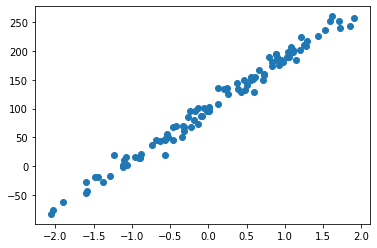

In [14]:
print(coef)
plt.scatter(x, y)

In [104]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

100.1760233129849


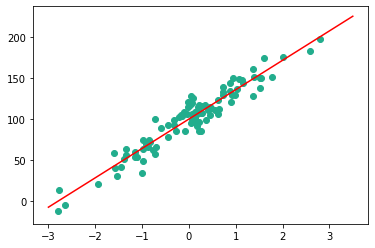

In [105]:
print(model.intercept_)
plt.plot([-3, 3.5], model.coef_*[-3,3.5] + model.intercept_, 'r-')
plt.scatter(x, y, c="#22ad8d")

In [106]:
model.score(x, y)

0.9187703348077818

In [107]:
model.coef_

array([35.78015702])

In [108]:
import pickle

In [109]:
pickle.dump(model, open('model.sk', 'wb'))

In [110]:
loaded_model = pickle.load(open('model.sk', 'rb'))

In [111]:
loaded_model.coef_

array([35.78015702])

In [115]:
import pandas as pd

/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [118]:
data = {'A':[1,2,3,5,2,7], 'B':[4,None,6,8,2,5], 'C':[7,None,9,89,9,2]}

In [119]:
df = pd.DataFrame(data)
df

,A,B,C
0,1,4.0,7.0
1,2,NaN,NaN
2,3,6.0,9.0
3,5,8.0,89.0
4,2,2.0,9.0
5,7,5.0,2.0


In [126]:
df.isnull().sum()

A    0
B    1
C    1
dtype: int64

In [132]:
df.B = df['B'].fillna(df['B'].mean())
df.C = df['C'].fillna(df['C'].mean())
df

,A,B,C
0,1,4.0,7.0
1,2,5.0,23.2
2,3,6.0,9.0
3,5,8.0,89.0
4,2,2.0,9.0
5,7,5.0,2.0


In [140]:
df.loc[0:2,'A'] = None
df.loc[3,'B'] = None

In [141]:
df

,A,B,C
0,NaN,4.0,7.0
1,NaN,5.0,23.2
2,NaN,6.0,9.0
3,5.0,NaN,89.0
4,2.0,2.0,9.0
5,7.0,5.0,2.0


In [148]:
df_dropped = df.dropna(subset=['A'])
df_dropped

,A,B,C
3,5.0,NaN,89.0
4,2.0,2.0,9.0
5,7.0,5.0,2.0


In [151]:
df_dropped.reset_index(drop=True)

,A,B,C
0,5.0,NaN,89.0
1,2.0,2.0,9.0
2,7.0,5.0,2.0


In [154]:
df

,A,B,C
0,NaN,4.0,7.0
1,NaN,5.0,23.2
2,NaN,6.0,9.0
3,5.0,NaN,89.0
4,2.0,2.0,9.0
5,7.0,5.0,2.0


In [157]:
df.loc[0,['B', 'C']] = [5.0, 23.2]
df

,A,B,C
0,NaN,5.0,23.2
1,NaN,5.0,23.2
2,NaN,6.0,9.0
3,5.0,NaN,89.0
4,2.0,2.0,9.0
5,7.0,5.0,2.0


In [167]:
df.duplicated(keep='last')

0     True
1    False
2    False
3    False
4    False
5    False
dtype: bool

In [170]:
df_no_dupiclates = df.drop_duplicates(keep='last')
df_no_dupiclates

,A,B,C
1,NaN,5.0,23.2
2,NaN,6.0,9.0
3,5.0,NaN,89.0
4,2.0,2.0,9.0
5,7.0,5.0,2.0


In [173]:
df_no_dupiclates.reset_index(drop=True)

,A,B,C
0,NaN,5.0,23.2
1,NaN,6.0,9.0
2,5.0,NaN,89.0
3,2.0,2.0,9.0
4,7.0,5.0,2.0


In [197]:
df[df.isnull()] = np.random.random()
df

,A,B,C
0,0.749076,5.000000,23.2
1,0.749076,5.000000,23.2
2,0.749076,6.000000,9.0
3,5.000000,0.749076,89.0
4,2.000000,2.000000,9.0
5,7.000000,5.000000,2.0


In [205]:
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df.values)
x_scaled

array([[0.        , 0.80955734, 0.24367816],
       [0.        , 0.80955734, 0.24367816],
       [0.        , 1.        , 0.08045977],
       [0.68004732, 0.        , 1.        ],
       [0.20011829, 0.23822936, 0.08045977],
       [1.        , 0.80955734, 0.        ]])

In [207]:
df_scaled_min_max = pd.DataFrame(x_scaled, columns=df.columns)
df_scaled_min_max

,A,B,C
0,0.000000,0.809557,0.243678
1,0.000000,0.809557,0.243678
2,0.000000,1.000000,0.080460
3,0.680047,0.000000,1.000000
4,0.200118,0.238229,0.080460
5,1.000000,0.809557,0.000000
